In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Asteroid_Updated.csv"

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [4]:
df.shape


(839714, 31)

In [5]:
list(df.columns)

['name',
 'a',
 'e',
 'i',
 'om',
 'w',
 'q',
 'ad',
 'per_y',
 'data_arc',
 'condition_code',
 'n_obs_used',
 'H',
 'neo',
 'pha',
 'diameter',
 'extent',
 'albedo',
 'rot_per',
 'GM',
 'BV',
 'UB',
 'IR',
 'spec_B',
 'spec_T',
 'G',
 'moid',
 'class',
 'n',
 'per',
 'ma']

In [6]:
df.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [7]:
df['diameter']=df['diameter'].astype('float')

In [8]:
df.describe()


,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,...,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,...,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,...,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,...,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,...,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,...,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,...,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,...,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


In [9]:
df.isna()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,True,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
839710,True,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
839711,True,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
839712,True,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  float64
 16  extent          18 non-null      object 
 17  albedo    

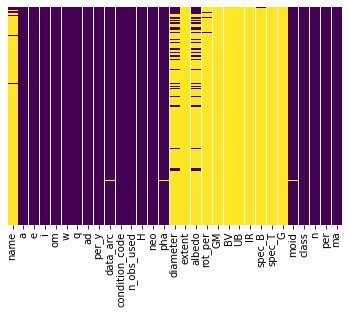

In [11]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')


In [12]:
df['diameter'].isnull().sum()

702078

In [13]:
df=df[df['diameter'].notnull()]

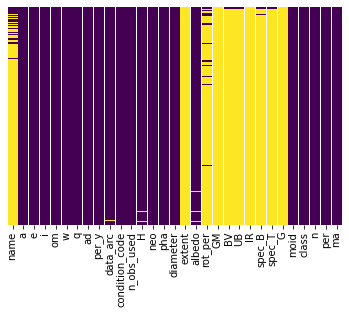

In [14]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df['condition_code']=df['condition_code'].astype('float')

In [16]:
df.drop('name',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137636 non-null  float64
 1   e               137636 non-null  float64
 2   i               137636 non-null  float64
 3   om              137636 non-null  float64
 4   w               137636 non-null  float64
 5   q               137636 non-null  float64
 6   ad              137636 non-null  float64
 7   per_y           137636 non-null  float64
 8   data_arc        137498 non-null  float64
 9   condition_code  137636 non-null  float64
 10  n_obs_used      137636 non-null  int64  
 11  H               136889 non-null  float64
 12  neo             137636 non-null  object 
 13  pha             137636 non-null  object 
 14  diameter        137636 non-null  float64
 15  extent          16 non-null      object 
 16  albedo          136406 non-null  float64
 17  rot_per   

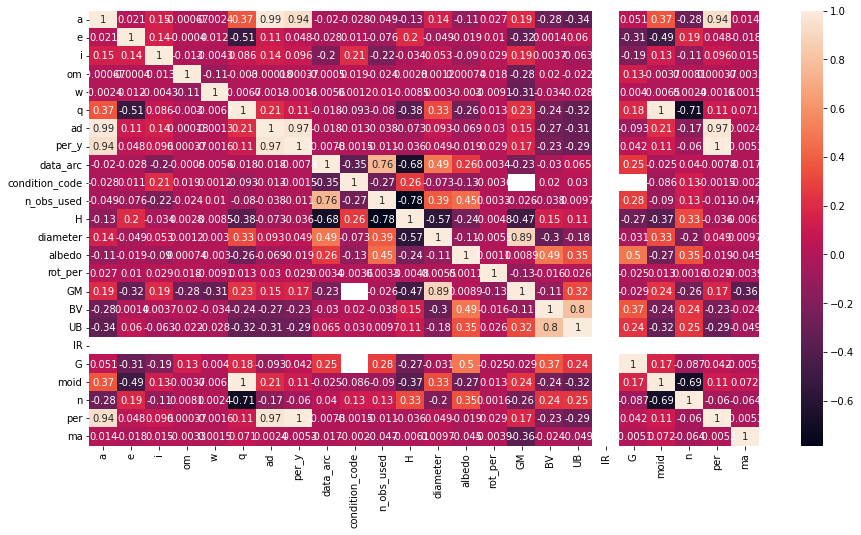

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

In [18]:
df.drop('extent',axis=1,inplace=True)

In [19]:
df.drop('GM',axis=1,inplace=True)
df.drop('BV',axis=1,inplace=True)
df.drop('UB',axis=1,inplace=True)
df.drop('IR',axis=1,inplace=True)
df.drop('spec_B',axis=1,inplace=True)
df.drop('spec_T',axis=1,inplace=True)
df.drop('G',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137636 non-null  float64
 1   e               137636 non-null  float64
 2   i               137636 non-null  float64
 3   om              137636 non-null  float64
 4   w               137636 non-null  float64
 5   q               137636 non-null  float64
 6   ad              137636 non-null  float64
 7   per_y           137636 non-null  float64
 8   data_arc        137498 non-null  float64
 9   condition_code  137636 non-null  float64
 10  n_obs_used      137636 non-null  int64  
 11  H               136889 non-null  float64
 12  neo             137636 non-null  object 
 13  pha             137636 non-null  object 
 14  diameter        137636 non-null  float64
 15  albedo          136406 non-null  float64
 16  rot_per         11188 non-null   float64
 17  moid      

In [20]:
df.drop('rot_per',axis=1,inplace=True)

In [21]:
df.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

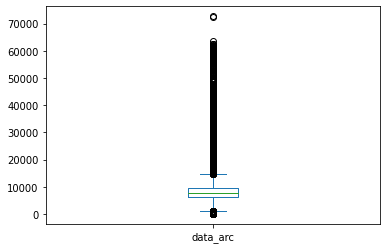

In [22]:
df.data_arc.plot(kind='box')


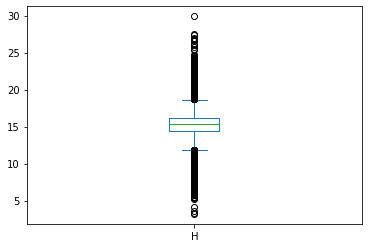

In [23]:
df.H.plot(kind='box')


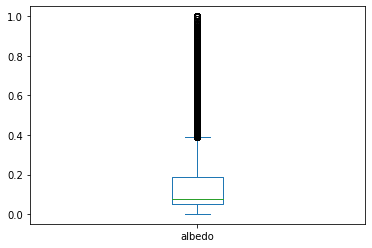

In [24]:
df.albedo.plot(kind='box')

In [25]:
df.dropna(axis=0, how='any', thresh=None, subset=['albedo', 'H', 'data_arc'], inplace=True)

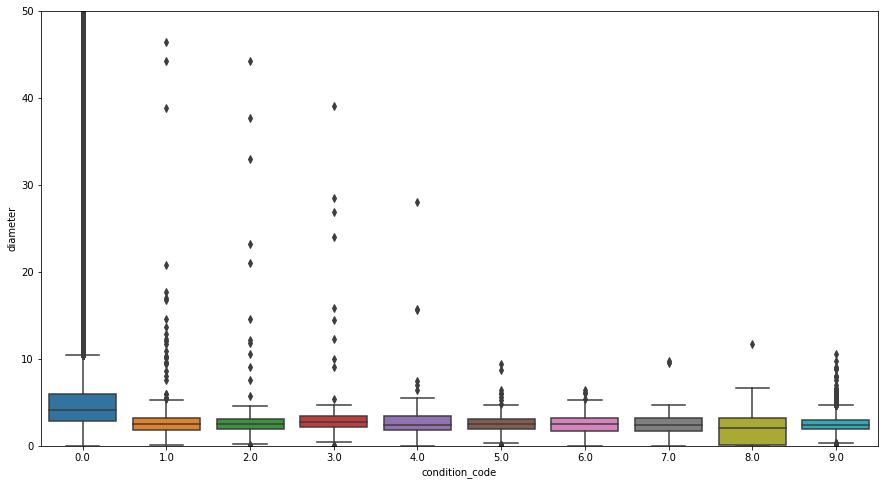

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='condition_code',y='diameter')
plt.ylim((0,50))
plt.show()

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
y=df["class"]
y.value_counts()

MBA    124971
OMB      7394
TJN      1873
IMB       564
APO       454
MCA       336
AMO       255
ATE        91
CEN        48
TNO        13
AST         6
Name: class, dtype: int64

In [28]:
df['class'] = oe.fit_transform(df[['class']],{0:'AST', 1:'IEO', 2:'ATE', 3:'APO', 4:'AMO', 5:'MCA', 6:'IMB', 7:'MBA', 8:'OMB', 9:'TJN', 10:'CEN', 11:'TNO', 12:'PAA', 13:'HYA'})

In [29]:
df['neo'].unique()

array(['N', 'Y'], dtype=object)

In [30]:
df['pha'].unique()

array(['N', 'Y'], dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False,handle_unknown='ignore')
df['neo'] = ohe.fit_transform(df[['neo']])
df['pha'] = ohe.fit_transform(df[['pha']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76efa28790>,
      dtype=object)

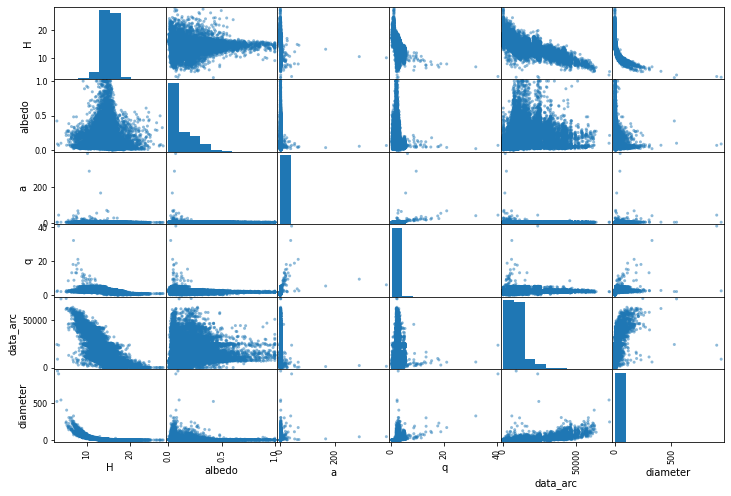

In [32]:
from pandas.plotting import scatter_matrix
attributes = ["H", "albedo", "a", "q", "data_arc", "diameter"]
scatter_matrix(df[attributes], figsize=(12, 8))

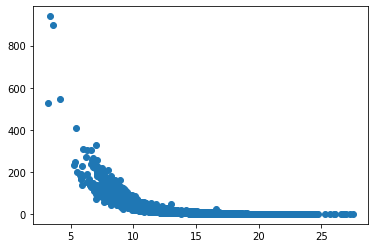

In [33]:
plt.scatter(df['H'], df['diameter'])


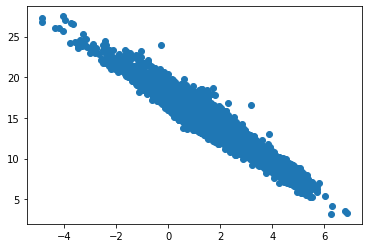

In [34]:
plt.scatter(np.log(df['diameter']), df['H'])

In [35]:
df_1 = df.assign(new_H = lambda x: 10 ** -x.H)

In [36]:
list(df_1.columns)

['a',
 'e',
 'i',
 'om',
 'w',
 'q',
 'ad',
 'per_y',
 'data_arc',
 'condition_code',
 'n_obs_used',
 'H',
 'neo',
 'pha',
 'diameter',
 'albedo',
 'moid',
 'class',
 'n',
 'per',
 'ma',
 'new_H']

In [37]:
corr_matrix = df_1.corr()
corr_matrix["diameter"].sort_values(ascending=False)

diameter          1.000000
data_arc          0.492149
n_obs_used        0.385211
new_H             0.359415
moid              0.332830
q                 0.330080
class             0.173466
a                 0.144500
ad                0.093346
i                 0.055954
per               0.048914
per_y             0.048914
neo               0.035350
pha               0.018864
ma                0.009703
w                 0.003155
om                0.001104
e                -0.048628
condition_code   -0.069268
albedo           -0.107944
n                -0.202887
H                -0.569545
Name: diameter, dtype: float64

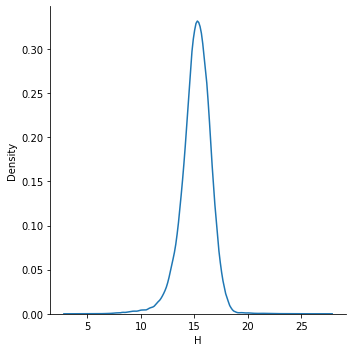

In [38]:
sns.displot(df, x = 'H', kind = 'kde')

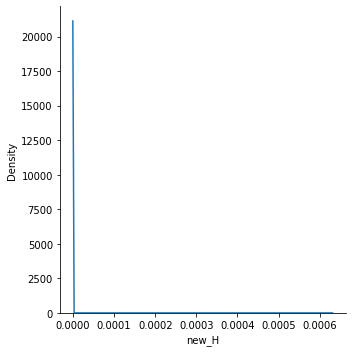

In [39]:
sns.displot(df_1, x = 'new_H', kind = 'kde')

In [40]:
df_1.drop('new_H', axis = 1)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,...,3.34,1.0,1.0,939.400,0.0900,1.594780,6.0,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,...,4.13,1.0,1.0,545.000,0.1010,1.233240,6.0,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,...,5.33,1.0,1.0,246.596,0.2140,1.034540,6.0,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,...,3.20,1.0,1.0,525.400,0.4228,1.139480,6.0,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0.0,...,6.85,1.0,1.0,106.699,0.2740,1.095890,6.0,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,2.0,...,18.20,1.0,1.0,1.077,0.1160,0.854315,6.0,0.175794,2047.852953,195.737632
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1.0,...,16.20,1.0,1.0,3.793,0.0210,1.663010,6.0,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2.0,...,17.30,1.0,1.0,2.696,0.0610,1.367330,6.0,0.242270,1485.943371,145.319581
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,2.0,...,17.20,1.0,1.0,3.271,0.0720,1.166840,6.0,0.184914,1946.853973,175.708508


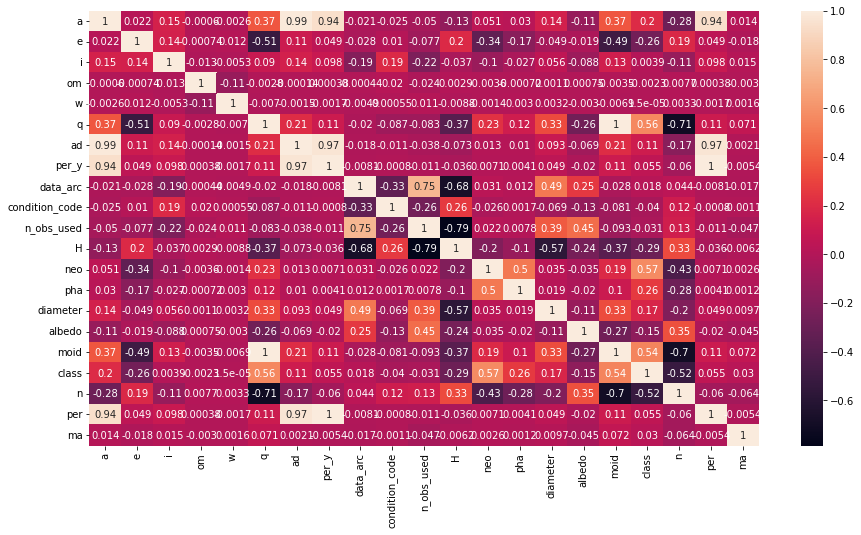

In [41]:
plt.figure(figsize = (15,8))
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

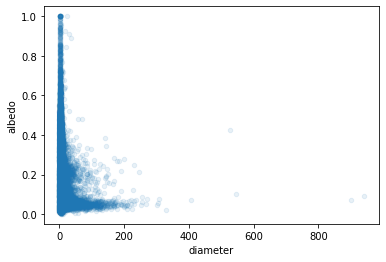

In [42]:
df.plot(kind="scatter", x="diameter", y="albedo", alpha=0.1)

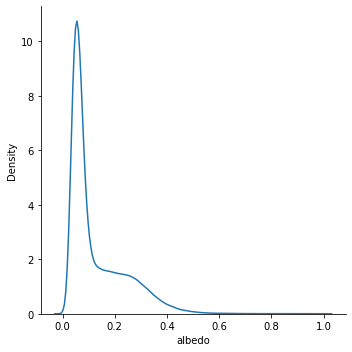

In [43]:
sns.displot(df, x = 'albedo', kind = 'kde')

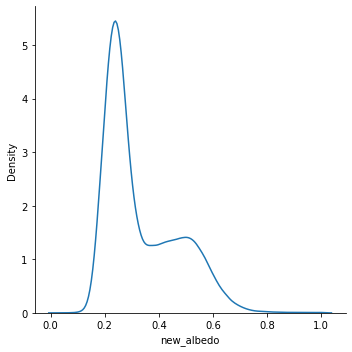

In [44]:
df_1 = df.assign(new_albedo = lambda x: np.sqrt(x.albedo))
sns.displot(df_1, x = 'new_albedo', kind = 'kde')

In [45]:
df_1.drop('albedo', axis = 1)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,moid,class,n,per,ma,new_albedo
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,...,3.34,1.0,1.0,939.400,1.594780,6.0,0.213885,1683.145708,77.372096,0.300000
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,...,4.13,1.0,1.0,545.000,1.233240,6.0,0.213503,1686.155999,59.699133,0.317805
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,...,5.33,1.0,1.0,246.596,1.034540,6.0,0.226019,1592.787285,34.925016,0.462601
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,...,3.20,1.0,1.0,525.400,1.139480,6.0,0.271609,1325.432765,95.861936,0.650231
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0.0,...,6.85,1.0,1.0,106.699,1.095890,6.0,0.238632,1508.600458,282.366289,0.523450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,2.0,...,18.20,1.0,1.0,1.077,0.854315,6.0,0.175794,2047.852953,195.737632,0.340588
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1.0,...,16.20,1.0,1.0,3.793,1.663010,6.0,0.174527,2062.713583,164.999439,0.144914
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2.0,...,17.30,1.0,1.0,2.696,1.367330,6.0,0.242270,1485.943371,145.319581,0.246982
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,2.0,...,17.20,1.0,1.0,3.271,1.166840,6.0,0.184914,1946.853973,175.708508,0.268328


In [46]:
from scipy.stats import spearmanr
coef, p = spearmanr(df['diameter'], df['H'])

In [47]:
print(coef)

-0.7448603259499111


In [48]:
coef2, p = spearmanr(df['diameter'], df['albedo'])
print(coef2)

-0.27155506188713335


In [49]:
coef3, p = spearmanr(df_1['diameter'], df_1['new_albedo'])
print(coef3)

-0.27155506188713335


In [50]:
df = df.assign(new_albedo = lambda x: np.sqrt(x.albedo))
df.drop('albedo', axis = 1)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,moid,class,n,per,ma,new_albedo
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,...,3.34,1.0,1.0,939.400,1.594780,6.0,0.213885,1683.145708,77.372096,0.300000
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,...,4.13,1.0,1.0,545.000,1.233240,6.0,0.213503,1686.155999,59.699133,0.317805
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,...,5.33,1.0,1.0,246.596,1.034540,6.0,0.226019,1592.787285,34.925016,0.462601
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,...,3.20,1.0,1.0,525.400,1.139480,6.0,0.271609,1325.432765,95.861936,0.650231
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0.0,...,6.85,1.0,1.0,106.699,1.095890,6.0,0.238632,1508.600458,282.366289,0.523450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,2.0,...,18.20,1.0,1.0,1.077,0.854315,6.0,0.175794,2047.852953,195.737632,0.340588
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1.0,...,16.20,1.0,1.0,3.793,1.663010,6.0,0.174527,2062.713583,164.999439,0.144914
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2.0,...,17.30,1.0,1.0,2.696,1.367330,6.0,0.242270,1485.943371,145.319581,0.246982
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,2.0,...,17.20,1.0,1.0,3.271,1.166840,6.0,0.184914,1946.853973,175.708508,0.268328


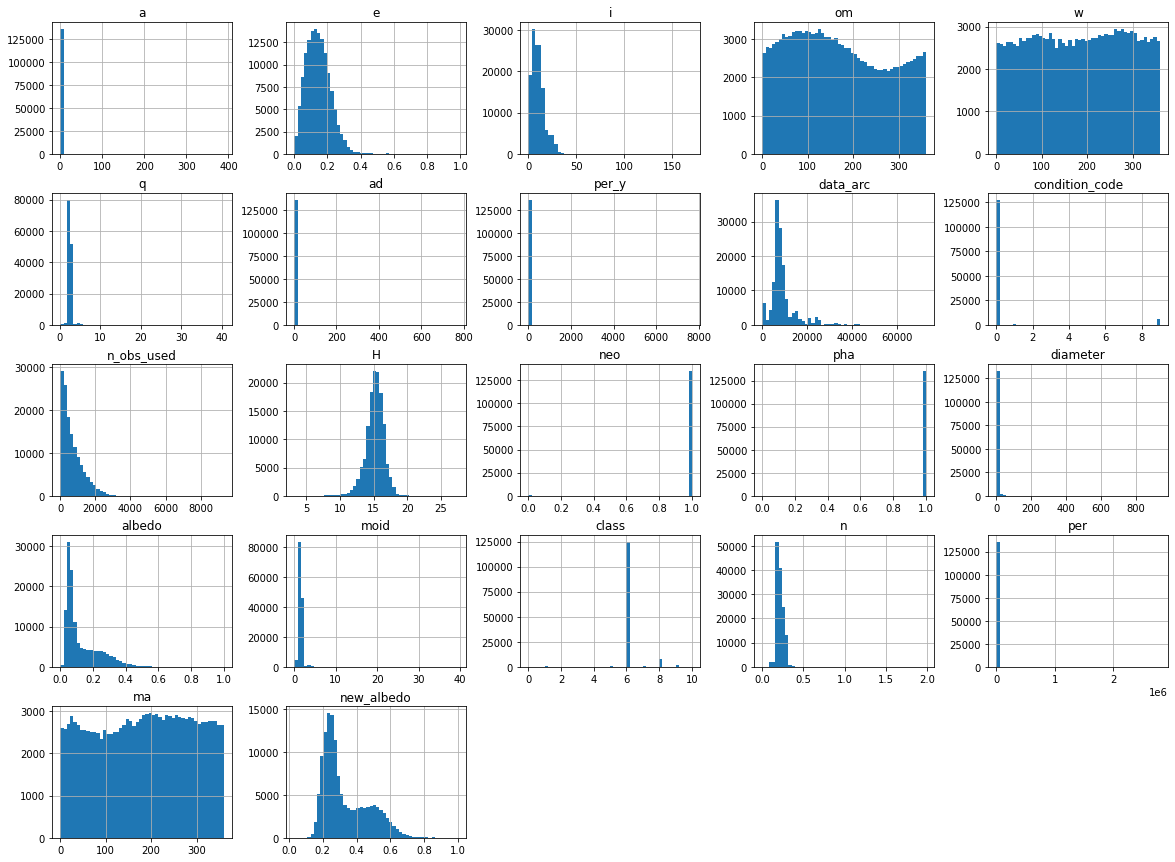

In [51]:
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76eb949210>,
      dtype=object)

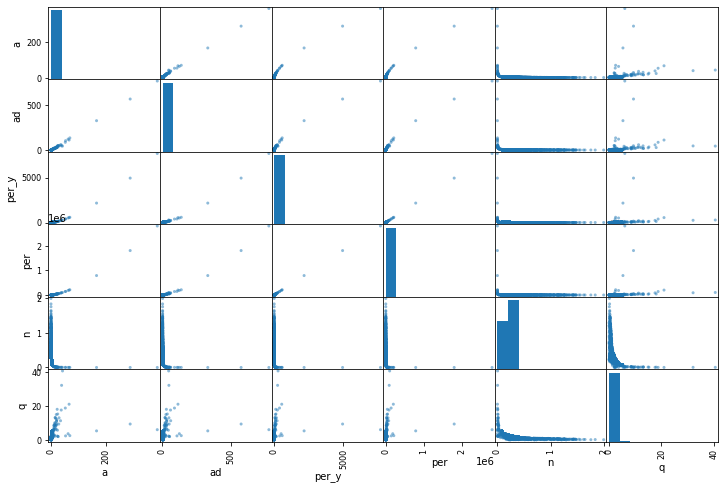

In [52]:
attr = ["a", "ad", "per_y", "per", "n", "q"]
scatter_matrix(df[attr], figsize=(12, 8))

In [53]:
df.drop('ad',axis=1,inplace=True)

In [54]:
df.drop('per',axis=1,inplace=True)

In [55]:
df.drop('per_y',axis=1,inplace=True)

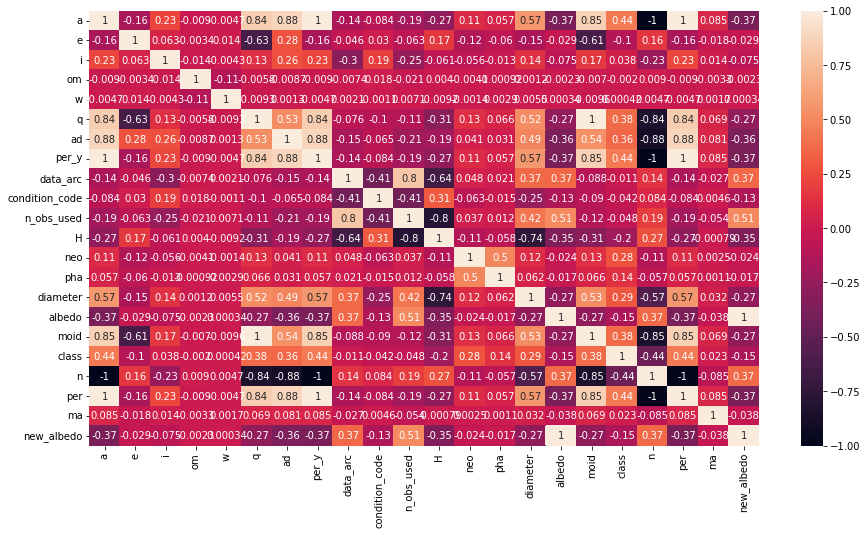

In [56]:
plt.figure(figsize = (15,8))

corr = df_1.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

In [57]:
df_1 = df.assign(nmoid = lambda x: x.moid / x.n)
coef, p = spearmanr(df_1['diameter'], df_1['nmoid'])
print(coef)

0.5637469413500026


In [58]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [59]:
diameter = train_set['diameter'] 
train_set.drop('diameter',axis=1,inplace=True)
diameter_test = test_set['diameter']
test_set.drop('diameter',axis=1,inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_set = pd.DataFrame(StandardScaler().fit_transform(train_set), columns=train_set.columns, index=train_set.index)
test_set = pd.DataFrame(StandardScaler().fit_transform(test_set), columns=test_set.columns, index=test_set.index)

In [61]:
from sklearn.metrics import r2_score

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set, diameter)

LinearRegression()

In [63]:
from sklearn.metrics import mean_squared_error
d_predictions = lin_reg.predict(test_set)
lin_mse = mean_squared_error(diameter_test, d_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


7.998002509760631

In [64]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


In [65]:
scores = cross_val_score(lin_reg, test_set, diameter_test, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [66]:
display_scores(lin_rmse_scores)

Scores: [ 5.74843349  8.16235103  4.83019351  7.97940529 17.72303383  6.99178267
  5.72649068  4.87375971  4.76134026  5.36017844]
Mean: 7.215696892158851
Standard deviation: 3.7006267048563113


In [67]:
r2_score(d_predictions,diameter_test)

-0.44734254066526513

In [68]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set, diameter)

DecisionTreeRegressor()

In [69]:
dia_predictions = tree_reg.predict(test_set)
tree_mse = mean_squared_error(diameter_test, dia_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.942166183474676

In [70]:
scores_tree = cross_val_score(tree_reg, test_set, diameter_test, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores_tree)

In [71]:
display_scores(tree_rmse_scores)

Scores: [ 2.06662007  2.05510606  1.7813409   2.08971103 16.67282703  2.36624999
  1.59833708  1.69253403  1.89217061  2.11289233]
Mean: 3.432778912640876
Standard deviation: 4.418608524159661


In [72]:
r2_score(dia_predictions,diameter_test)

0.8998208251127129

In [73]:
from lightgbm import LGBMRegressor

In [74]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,
              min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,
              num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,
              subsample=0.6)

In [75]:
lgbm = model_lgb.fit(train_set, diameter)


In [76]:
lgb_predictions = model_lgb.predict(test_set)
lgbm_mse = mean_squared_error(diameter_test, lgb_predictions)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_rmse

4.3116677305893845

In [77]:
scores_lgb = cross_val_score(model_lgb, test_set, diameter_test, scoring="neg_mean_squared_error", cv=10)
lgb_rmse_scores = np.sqrt(-scores_lgb)
display_scores(lgb_rmse_scores)

Scores: [ 2.12944865  3.64459571  1.81418832  2.65557488 15.75288864  2.90712509
  2.06950055  4.32425632  1.83571511  2.25286415]
Mean: 3.938615742503837
Standard deviation: 4.01330532117425


In [78]:
r2_score(lgb_predictions,diameter_test)

0.8057389363707512

In [79]:
import xgboost as xg


In [80]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [81]:
xgb_r.fit(train_set, diameter)

[18:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=10, seed=123)

In [82]:
dia_predic = xgb_r.predict(test_set)
xgb_mse = mean_squared_error(diameter_test, dia_predic)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

5.8268571098648545

In [83]:
scores_xgb = cross_val_score(xgb_r, test_set, diameter_test, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-scores_xgb)
display_scores(xgb_rmse_scores)

[18:03:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [84]:
r2_score(dia_predic,diameter_test)

-0.20749800465068335

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_set, diameter)


In [ ]:
dia_predict = regressor.predict(test_set)
svm_mse = mean_squared_error(diameter_test, dia_predict)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [ ]:
scores_svm = cross_val_score(regressor, test_set, diameter_test, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores_svm)
display_scores(svm_rmse_scores)

In [ ]:
r2_score(dia_predict,diameter_test)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape= train_set.shape[1:]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam', loss="mean_squared_error", metrics=['accuracy'])

In [ ]:
model.fit(train_set, diameter, epochs=30)

In [ ]:
 y_pred = model.predict(test_set)

In [ ]:
dnn_mse = mean_squared_error(diameter_test, y_pred)
dnn_rmse = np.sqrt(dnn_mse)
dnn_rmse


In [ ]:
scores_dnn = cross_val_score(model, test_set, diameter_test, scoring="neg_mean_squared_error", cv=10)
dnn_rmse_scores = np.sqrt(-scores_dnn)
display_scores(dnn_rmse_scores)

In [ ]:
r2_score(y_pred,diameter_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_reg.fit(train_set, diameter)
y_pred_rf = rnd_reg.predict(test_set)
rf_mse = mean_squared_error(diameter_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse


In [ ]:
scores_rf = cross_val_score(rnd_reg, test_set, diameter_test, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores_rf)
display_scores(rf_rmse_scores)

In [ ]:
r2_score(y_pred_rf,diameter_test)

In [ ]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rnd_reg.get_params())

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [90, 100, 110, 120, 150, 200], 'max_features': ['auto', 'sqrt']}
grid_search = GridSearchCV(rnd_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set, diameter)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(test_set, diameter_test)

In [ ]:
best_random = grid_search.best_estimator_
pred_best = best_random.predict(test_set)
scores_best = cross_val_score(best_random, test_set, diameter_test, scoring="neg_mean_squared_error", cv=10)
best_rmse_scores = np.sqrt(-scores_best)
display_scores(best_rmse_scores)


In [ ]:
r2_score(pred_best,diameter_test)